<a href="https://colab.research.google.com/github/Rhysand9000/telecom-x-churn-prediction/blob/main/PROYECTO_TELECOM_X_PARTE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- PREPARACION DE LOS DATOS

1.1.-Extracción del Archivo Tratado

In [1]:
import pandas as pd

# Primero utilizo la URL RAW del archivo en GitHub para leer el CSV
url = "https://raw.githubusercontent.com/Rhysand9000/telecom-x-churn-prediction/main/data/datos_tratados_telecom.csv"

# Ahora realizo la carga del dataset
df = pd.read_csv(url)

# A continuación elimino columnas que no aportan al análisis, como identificadores únicos
columnas_irrelevantes = ["customerID"]
df = df.drop(columns=columnas_irrelevantes)

# Finalmente verifico que la carga y limpieza inicial se hicieron correctamente
print("Columnas actuales después de eliminar irrelevantes:")
print(df.columns.tolist())


Columnas actuales después de eliminar irrelevantes:
['CanceloServicio', 'Genero', 'AdultoMayor', 'Pareja', 'Dependientes', 'tenure', 'ServicioTelefonico', 'LineasMultiples', 'InternetService', 'SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico', 'TVStreaming', 'PeliculasStreaming', 'TipoContrato', 'FacturacionElectronica', 'MetodoPago', 'Facturacion_Mensual', 'Facturacion_Total', 'Facturacion_Diaria']


1.2.-Eliminación de Columnas Irrelevantes

In [2]:
# Primero identifico las columnas que no aportan valor al análisis o a los modelos predictivos
# 'customerID' es un identificador único que no influye en la predicción de cancelación
columnas_irrelevantes = ["customerID"]

# Ahora verifico si estas columnas están presentes antes de intentar eliminarlas
columnas_presentes = [col for col in columnas_irrelevantes if col in df.columns]

if columnas_presentes:
    # Si la columna existe, la elimino
    df = df.drop(columns=columnas_presentes)
    print(f"Se eliminaron las columnas: {columnas_presentes}")
else:
    # Si no existe, informo que no se encontró
    print(f"No se encontraron las columnas irrelevantes en el DataFrame: {columnas_irrelevantes}")

# Finalmente muestro las columnas actuales para confirmar
print("\nColumnas actuales en el DataFrame:")
print(df.columns.tolist())



No se encontraron las columnas irrelevantes en el DataFrame: ['customerID']

Columnas actuales en el DataFrame:
['CanceloServicio', 'Genero', 'AdultoMayor', 'Pareja', 'Dependientes', 'tenure', 'ServicioTelefonico', 'LineasMultiples', 'InternetService', 'SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico', 'TVStreaming', 'PeliculasStreaming', 'TipoContrato', 'FacturacionElectronica', 'MetodoPago', 'Facturacion_Mensual', 'Facturacion_Total', 'Facturacion_Diaria']


1.3.-Encoding

In [3]:
# Primero identifico las columnas categóricas que necesitan ser transformadas a formato numérico
columnas_categoricas = df.select_dtypes(include=["object"]).columns.tolist()
print("Columnas categóricas detectadas:", columnas_categoricas)

# Ahora realizo la codificación usando One-Hot Encoding
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Finalmente verifico que solo tengo variables numéricas y muestro el DataFrame
print("\nTipos de datos después de la codificación:")
print(df.dtypes.value_counts())

print("\nVista previa del DataFrame codificado:")
df.head()


Columnas categóricas detectadas: ['Genero', 'InternetService', 'TipoContrato', 'MetodoPago']

Tipos de datos después de la codificación:
float64    11
bool        8
int64       6
Name: count, dtype: int64

Vista previa del DataFrame codificado:


,CanceloServicio,AdultoMayor,Pareja,Dependientes,tenure,ServicioTelefonico,LineasMultiples,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,...,Facturacion_Total,Facturacion_Diaria,Genero_Male,InternetService_Fiber optic,InternetService_No,TipoContrato_One year,TipoContrato_Two year,MetodoPago_Credit card (automatic),MetodoPago_Electronic check,MetodoPago_Mailed check
0,0.0,0,1,1,9,1,0.0,0.0,1.0,0.0,...,593.30,2.19,False,False,False,True,False,False,False,True
1,0.0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,542.40,2.00,True,False,False,False,False,False,False,True
2,1.0,0,0,0,4,1,0.0,0.0,0.0,1.0,...,280.85,2.46,True,True,False,False,False,False,True,False
3,1.0,1,1,0,13,1,0.0,0.0,1.0,1.0,...,1237.85,3.27,True,True,False,False,False,False,True,False
4,1.0,1,1,0,3,1,0.0,0.0,0.0,0.0,...,267.40,2.80,False,True,False,False,False,False,False,True


1.4.-Verificación de la Proporción de Cancelación (Churn)

In [4]:
# Primero identifico la columna que representa la variable objetivo (cancelación de servicio)
columna_objetivo = "CanceloServicio"

# Ahora verifico que la columna exista en el DataFrame antes de continuar
if columna_objetivo in df.columns:
    # Calculo la distribución absoluta (conteo) de cada clase
    print("Distribución absoluta de la variable objetivo:")
    print(df[columna_objetivo].value_counts(dropna=False))

    # Calculo la distribución relativa (porcentaje) de cada clase
    print("\nDistribución porcentual de la variable objetivo:")
    print((df[columna_objetivo].value_counts(normalize=True, dropna=False) * 100).round(2))
else:
    print(f"La columna '{columna_objetivo}' no existe en el DataFrame.")


Distribución absoluta de la variable objetivo:
CanceloServicio
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64

Distribución porcentual de la variable objetivo:
CanceloServicio
0.0    71.20
1.0    25.72
NaN     3.08
Name: proportion, dtype: float64


1.5.-Balanceo de Clases (opcional)

In [5]:
# Primero separo la variable objetivo y las características para tener claro qué voy a preprocesar
columna_objetivo = "CanceloServicio"
X = df.drop(columns=[columna_objetivo])
y = df[columna_objetivo]

# Ahora elimino filas donde la variable objetivo esté nula, porque no puedo entrenar sin la etiqueta
# (Este paso es importante para evitar errores posteriores y asegurar la calidad del dataset)
mask_y_no_nulo = y.notna()
X = X[mask_y_no_nulo].copy()
y = y[mask_y_no_nulo].astype(int).copy()  # Aquí convierto a entero para asegurar consistencia

# A continuación divido el dataset en entrenamiento y prueba para evitar fuga de información
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Luego imputo los valores faltantes SOLO usando información del conjunto de entrenamiento
# (Con esto me aseguro de no contaminar el proceso con datos del conjunto de prueba)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Aquí ajusto el imputador con X_train y transformo ambos conjuntos
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

# Ahora aplico SMOTE únicamente sobre el conjunto de entrenamiento ya imputado
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Distribución original en train:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_imp, y_train)

print("Distribución después de SMOTE en train:", Counter(y_train_sm))

# Finalmente dejo preparados los conjuntos que usaré para modelar
# (X_train_sm, y_train_sm) serán mis datos de entrenamiento balanceados
# (X_test_imp, y_test) serán mis datos de evaluación sin modificar
print(f"\nTamaños -> X_train_sm: {X_train_sm.shape}, y_train_sm: {y_train_sm.shape}")
print(f"Tamaños -> X_test_imp: {X_test_imp.shape}, y_test: {y_test.shape}")


Distribución original en train: Counter({0: 4139, 1: 1495})
Distribución después de SMOTE en train: Counter({0: 4139, 1: 4139})

Tamaños -> X_train_sm: (8278, 24), y_train_sm: (8278,)
Tamaños -> X_test_imp: (1409, 24), y_test: (1409,)


1.6.-Normalización o Estandarización (si es necesario)

In [6]:
from sklearn.preprocessing import StandardScaler

# Primero imputamos como ya lo tienes
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

# Ahora aplicamos estandarización SOLO sobre el conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)

# Aplicamos SMOTE sobre el conjunto de entrenamiento escalado
print("Distribución original en train:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)
print("Distribución después de SMOTE en train:", Counter(y_train_sm))

# Listo para modelar
print(f"\nTamaños -> X_train_sm: {X_train_sm.shape}, y_train_sm: {y_train_sm.shape}")
print(f"Tamaños -> X_test_scaled: {X_test_scaled.shape}, y_test: {y_test.shape}")


Distribución original en train: Counter({0: 4139, 1: 1495})
Distribución después de SMOTE en train: Counter({0: 4139, 1: 4139})

Tamaños -> X_train_sm: (8278, 24), y_train_sm: (8278,)
Tamaños -> X_test_scaled: (1409, 24), y_test: (1409,)


# 2.-Correlación y Selección de Variables

2.1.-Análisis de Correlación

Top 15 variables más correlacionadas (en valor absoluto) con 'CanceloServicio':



,variable,corr,abs_corr
0,tenure,-0.351948,0.351948
1,MetodoPago_Electronic check,0.304426,0.304426
2,InternetService_Fiber optic,0.303902,0.303902
3,TipoContrato_Two year,-0.302556,0.302556
4,InternetService_No,-0.225631,0.225631
5,Facturacion_Total,-0.201819,0.201819
6,FacturacionElectronica,0.192693,0.192693
7,Facturacion_Diaria,0.188926,0.188926
8,Facturacion_Mensual,0.188884,0.188884
9,TipoContrato_One year,-0.180497,0.180497


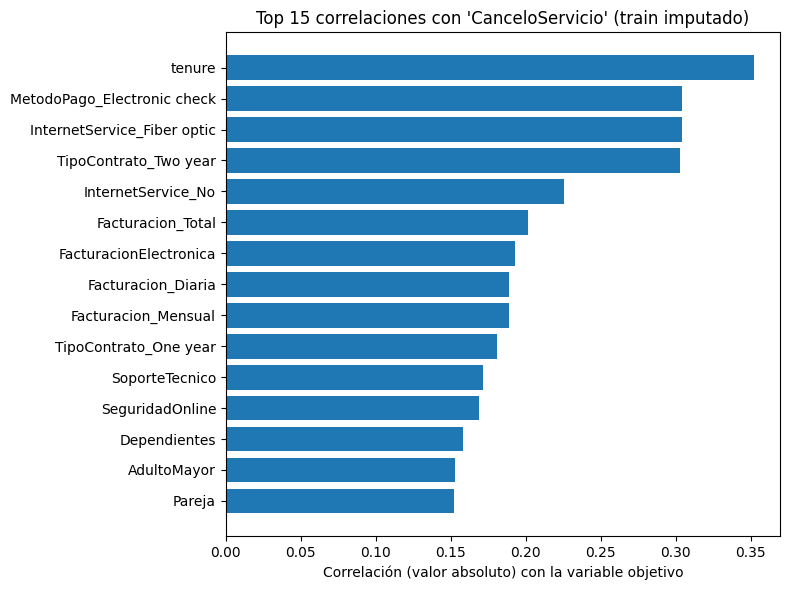

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Primero reconstruyo un DataFrame con los datos de entrenamiento imputados para poder calcular correlaciones con nombres de columnas
# (Uso X_train_imp porque aquí aún conservo la estructura original de las variables)
df_train_imp = pd.DataFrame(X_train_imp, columns=X_train.columns)

# Ahora añado la columna objetivo correspondiente al mismo conjunto de entrenamiento
df_train_imp[columna_objetivo] = y_train.values

# A continuación calculo la matriz de correlación de Pearson entre todas las variables numéricas
corr_matrix = df_train_imp.corr(method="pearson")

# Luego extraigo la correlación de cada variable con la variable objetivo y la ordeno por magnitud
corr_target = corr_matrix[columna_objetivo].drop(labels=[columna_objetivo])
corr_target_abs = corr_target.abs().sort_values(ascending=False)

# Ahora muestro por consola las 15 variables con mayor (|correlación|) con la cancelación
top_n = 15
print(f"Top {top_n} variables más correlacionadas (en valor absoluto) con '{columna_objetivo}':\n")
display(pd.DataFrame({
    "variable": corr_target_abs.index,
    "corr": corr_target.loc[corr_target_abs.index].values,
    "abs_corr": corr_target_abs.values
}).head(top_n))

# Finalmente genero un gráfico de barras horizontal con las correlaciones (valor absoluto) para visualizarlas mejor
plt.figure(figsize=(8, 6))
indices = np.arange(min(top_n, len(corr_target_abs)))
vals = corr_target_abs.values[:top_n][::-1]
labels = corr_target_abs.index[:top_n][::-1]
plt.barh(indices, vals)
plt.yticks(indices, labels)
plt.xlabel("Correlación (valor absoluto) con la variable objetivo")
plt.title(f"Top {top_n} correlaciones con '{columna_objetivo}' (train imputado)")
plt.tight_layout()
plt.show()


2.2.-Análisis Dirigido

Columna de tiempo detectada: tenure
Columna de gasto  detectada: Facturacion_Total


<Figure size 600x400 with 0 Axes>

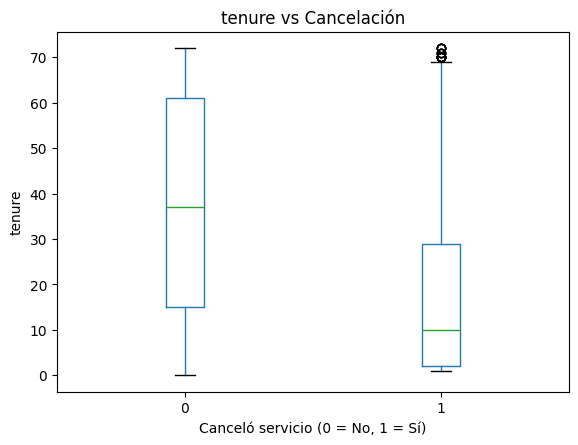

<Figure size 600x400 with 0 Axes>

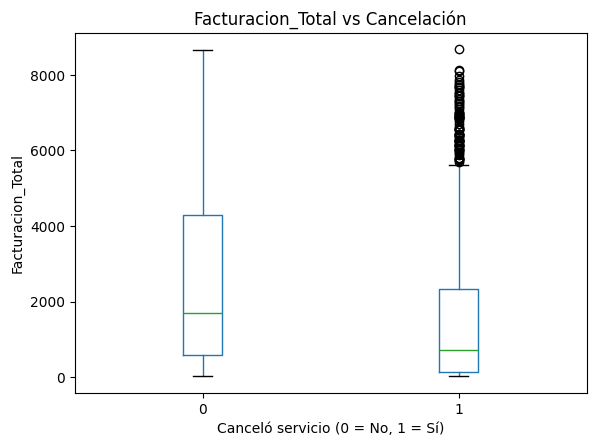

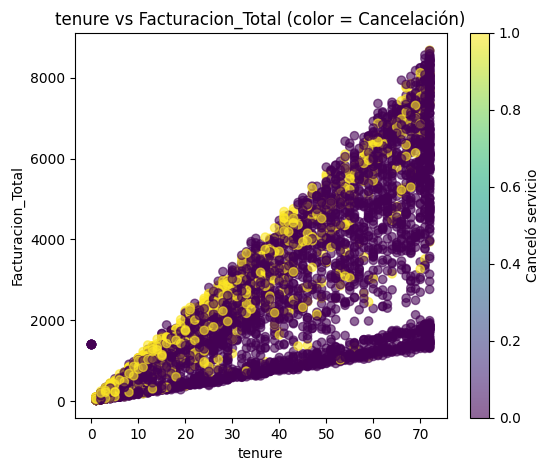

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Primero defino listas de posibles nombres para cada variable que quiero analizar
posibles_tiempo = ["tenure", "TiempoContrato", "Tiempo_de_contrato"]
posibles_gasto  = ["Facturacion_Total", "TotalCharges", "GastoTotal", "FacturacionTotal"]

# Ahora busco qué nombre existe realmente en mi DataFrame imputado de entrenamiento
tiempo_col = next((c for c in posibles_tiempo if c in df_train_imp.columns), None)
gasto_col  = next((c for c in posibles_gasto  if c in df_train_imp.columns), None)

# A continuación verifico que efectivamente encontré ambas columnas
print(f"Columna de tiempo detectada: {tiempo_col}")
print(f"Columna de gasto  detectada: {gasto_col}")

if (tiempo_col is None) or (gasto_col is None):
    # Si falta alguna, muestro las columnas disponibles para ayudarme a elegir
    print("\nNo pude encontrar alguna de las columnas esperadas. Estas son las columnas disponibles:")
    print(df_train_imp.columns.tolist())
else:
    # Antes de graficar, me aseguro de que ambas columnas estén en formato numérico
    df_train_imp[tiempo_col] = pd.to_numeric(df_train_imp[tiempo_col], errors="coerce")
    df_train_imp[gasto_col]  = pd.to_numeric(df_train_imp[gasto_col],  errors="coerce")

    # Ahora genero el boxplot: Tiempo vs Cancelación
    plt.figure(figsize=(6, 4))
    df_train_imp.boxplot(column=tiempo_col, by=columna_objetivo, grid=False)
    plt.title(f"{tiempo_col} vs Cancelación")
    plt.suptitle("")
    plt.xlabel("Canceló servicio (0 = No, 1 = Sí)")
    plt.ylabel(tiempo_col)
    plt.show()

    # Luego genero el boxplot: Gasto vs Cancelación
    plt.figure(figsize=(6, 4))
    df_train_imp.boxplot(column=gasto_col, by=columna_objetivo, grid=False)
    plt.title(f"{gasto_col} vs Cancelación")
    plt.suptitle("")
    plt.xlabel("Canceló servicio (0 = No, 1 = Sí)")
    plt.ylabel(gasto_col)
    plt.show()

    # Finalmente genero un scatter: Tiempo vs Gasto, coloreado por Cancelación
    plt.figure(figsize=(6, 5))
    plt.scatter(
        df_train_imp[tiempo_col],
        df_train_imp[gasto_col],
        c=df_train_imp[columna_objetivo],
        alpha=0.6
    )
    plt.title(f"{tiempo_col} vs {gasto_col} (color = Cancelación)")
    plt.xlabel(tiempo_col)
    plt.ylabel(gasto_col)
    cbar = plt.colorbar()
    cbar.set_label("Canceló servicio")
    plt.show()


# 3.-Modelado Predictivo

3.1.-Separación de Datos

In [9]:
# Primero defino la variable objetivo y separo X (características) e y (etiqueta) a partir del DataFrame actual
columna_objetivo = "CanceloServicio"
X = df.drop(columns=[columna_objetivo])
y = df[columna_objetivo]

# Ahora elimino filas donde la etiqueta esté nula, porque no puedo entrenar sin la variable objetivo
mask_y_no_nulo = y.notna()
X = X[mask_y_no_nulo].copy()
y = y[mask_y_no_nulo].astype(int).copy()

# A continuación realizo la separación de datos en entrenamiento y prueba
# Aquí utilizo 80% para entrenamiento y 20% para prueba, con estratificación para mantener el balance de clases
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 20% para prueba
    random_state=42,       # Reproducibilidad
    stratify=y             # Mantengo la proporción de clases en ambos conjuntos
)

# Finalmente, verifico tamaños y que la estratificación mantuvo la proporción de clases
print(f"Tamaño de entrenamiento: {X_train.shape[0]} filas | columnas: {X_train.shape[1]}")
print(f"Tamaño de prueba:       {X_test.shape[0]} filas | columnas: {X_test.shape[1]}")

# Aquí calculo la distribución de clases en train y test para confirmar que se parecen a la original
import pandas as pd

print("\nDistribución de clases en el conjunto completo:")
print((y.value_counts(normalize=True) * 100).round(2))

print("\nDistribución de clases en TRAIN:")
print((y_train.value_counts(normalize=True) * 100).round(2))

print("\nDistribución de clases en TEST:")
print((y_test.value_counts(normalize=True) * 100).round(2))


Tamaño de entrenamiento: 5634 filas | columnas: 24
Tamaño de prueba:       1409 filas | columnas: 24

Distribución de clases en el conjunto completo:
CanceloServicio
0    73.46
1    26.54
Name: proportion, dtype: float64

Distribución de clases en TRAIN:
CanceloServicio
0    73.46
1    26.54
Name: proportion, dtype: float64

Distribución de clases en TEST:
CanceloServicio
0    73.46
1    26.54
Name: proportion, dtype: float64


3.2.-Creación de Modelos

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

# =========================
# MODELO 1: REGRESIÓN LOGÍSTICA (requiere normalización e imputación)
# =========================
modelo_log = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Rellenar NaN con la mediana
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(random_state=42, max_iter=1000))
])

modelo_log.fit(X_train, y_train)
y_pred_log = modelo_log.predict(X_test)
y_pred_proba_log = modelo_log.predict_proba(X_test)[:, 1]

print("=== REGRESIÓN LOGÍSTICA ===")
print(classification_report(y_test, y_pred_log))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_log):.4f}")

# =========================
# MODELO 2: RANDOM FOREST (solo imputación, sin normalización)
# =========================
modelo_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("rf", RandomForestClassifier(random_state=42))
])

modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
y_pred_proba_rf = modelo_rf.predict_proba(X_test)[:, 1]

print("\n=== RANDOM FOREST ===")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")



=== REGRESIÓN LOGÍSTICA ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC AUC: 0.8431

=== RANDOM FOREST ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC: 0.8239


# 4.-Interpretación y Conclusiones

4.1.-Análisis de la Importancia de las Variables

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Primero obtengo los nombres de las variables tal como entraron al pipeline (no cambian con imputación/escalado)
feature_names = X_train.columns

# Ahora extraigo los coeficientes de la Regresión Logística (positivos elevan la probabilidad de churn, negativos la reducen)
coef_log = modelo_log.named_steps["logreg"].coef_[0]
importancia_log = pd.DataFrame({
    "Variable": feature_names,
    "Imp_Logistica": coef_log
})
# Aquí calculo el valor absoluto para medir magnitud (fuerza) sin importar el signo
importancia_log["Abs_Logistica"] = importancia_log["Imp_Logistica"].abs()

# A continuación extraigo la importancia de variables del Random Forest (basada en reducción de impureza)
imp_rf = modelo_rf.named_steps["rf"].feature_importances_
importancia_rf = pd.DataFrame({
    "Variable": feature_names,
    "Imp_RandomForest": imp_rf
})

# Ahora uno ambas tablas por el nombre de la variable para tener todo en un solo lugar
importancia_comb = importancia_log.merge(importancia_rf, on="Variable", how="outer").fillna(0.0)

# Luego calculo un ranking por cada modelo para poder compararlas de forma equilibrada
importancia_comb["Rank_Log"] = importancia_comb["Abs_Logistica"].rank(ascending=False, method="dense")
importancia_comb["Rank_RF"]  = importancia_comb["Imp_RandomForest"].rank(ascending=False, method="dense")

# Aquí genero un ranking promedio como criterio combinado (menor valor = más importante en ambos)
importancia_comb["Rank_Promedio"] = (importancia_comb["Rank_Log"] + importancia_comb["Rank_RF"]) / 2

# Finalmente ordeno por el ranking combinado para ver las variables más fuertes según ambos modelos
importancia_ordenada = importancia_comb.sort_values("Rank_Promedio").reset_index(drop=True)

# En este punto muestro las 20 variables más importantes con sus métricas y rankings
top_n = 20
print(f"Top {top_n} variables por ranking combinado (Logística + Random Forest):")
display(importancia_ordenada.head(top_n)[[
    "Variable", "Imp_Logistica", "Abs_Logistica", "Imp_RandomForest", "Rank_Log", "Rank_RF", "Rank_Promedio"
]])


Top 20 variables por ranking combinado (Logística + Random Forest):


,Variable,Imp_Logistica,Abs_Logistica,Imp_RandomForest,Rank_Log,Rank_RF,Rank_Promedio
0,Facturacion_Total,0.675935,0.675935,0.175907,2.0,1.0,1.5
1,tenure,-1.406328,1.406328,0.156837,1.0,2.0,1.5
2,InternetService_Fiber optic,0.562761,0.562761,0.036528,4.0,5.0,4.5
3,Facturacion_Mensual,-0.276253,0.276253,0.142269,7.0,3.0,5.0
4,TipoContrato_Two year,-0.583977,0.583977,0.033953,3.0,7.0,5.0
5,Facturacion_Diaria,-0.234762,0.234762,0.117813,8.0,4.0,6.0
6,TipoContrato_One year,-0.280140,0.280140,0.022244,6.0,10.0,8.0
7,MetodoPago_Electronic check,0.191231,0.191231,0.036368,11.0,6.0,8.5
8,FacturacionElectronica,0.178582,0.178582,0.023643,12.0,9.0,10.5
9,SoporteTecnico,-0.158756,0.158756,0.021866,13.0,11.0,12.0


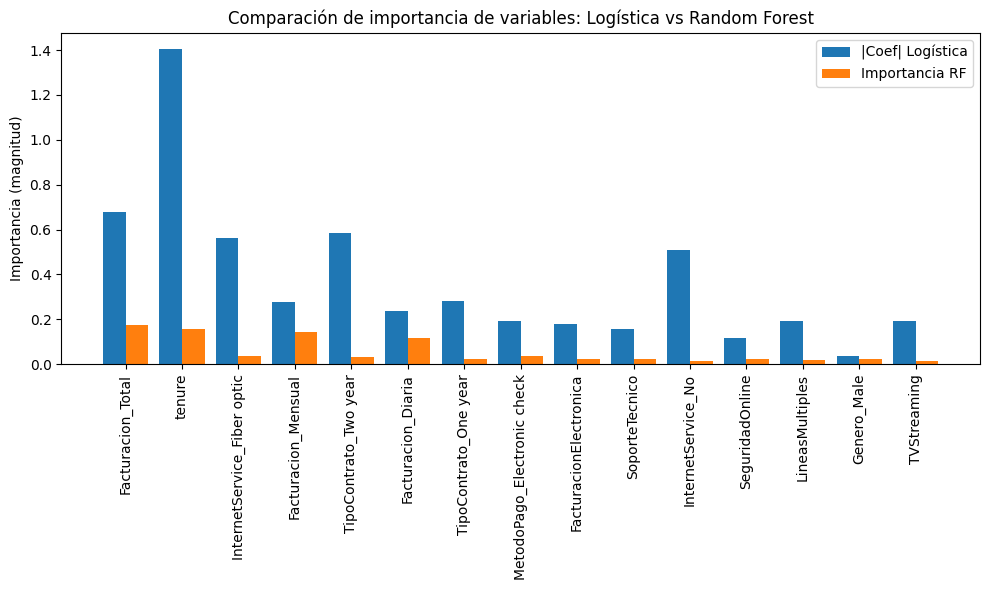

In [12]:
# Ahora preparo un gráfico comparativo (barras lado a lado) para las top-k variables según ranking combinado
top_k = 15
top_plot = importancia_ordenada.head(top_k)

# Aquí creo el gráfico con dos barras por variable: una para Logística (|coef|) y otra para Random Forest (importancia)
indices = np.arange(len(top_plot))
ancho = 0.4

plt.figure(figsize=(10, 6))
plt.bar(indices - ancho/2, top_plot["Abs_Logistica"], width=ancho, label="|Coef| Logística")
plt.bar(indices + ancho/2, top_plot["Imp_RandomForest"], width=ancho, label="Importancia RF")

# Finalmente dejo etiquetas y formato para facilitar la lectura
plt.xticks(indices, top_plot["Variable"], rotation=90)
plt.ylabel("Importancia (magnitud)")
plt.title("Comparación de importancia de variables: Logística vs Random Forest")
plt.legend()
plt.tight_layout()
plt.show()


4.2.-Conclusión

**Principales factores que afectan la cancelación de clientes (Churn):**

1. Tenure (antigüedad del cliente):

   - **Los clientes con menos meses de permanencia presentan una mayor probabilidad de cancelar.

   - **El boxplot mostró que quienes cancelan suelen tener un tenure menor que quienes permanecen.

2. Facturación (Facturacion_Total / Mensual / Diaria):

   - **Facturación acumulada o mensual baja se asocia con mayor churn; en parte está correlacionada con un menor tenure.

   - **Conviene analizar ticket promedio (ARPU) para separar el efecto de permanencia del nivel de gasto.

3. Variables de servicio y contrato (según importancia en modelos):

   - **Tipo de contrato: los contratos mensuales presentan mayor churn que One year y Two year (categorías de referencia del One-Hot).

   - **InternetService: clientes con Fiber optic muestran mayor churn respecto a la categoría base.

   - **Servicios adicionales: menos servicios contratados se asocia con mayor churn.

4. Método de pago y fricción de cobro:

   - **Electronic check se asocia con mayor churn respecto a la categoría base.

   - **La fricción en el proceso de pago puede contribuir a la cancelación.

**Estrategias de retención recomendadas:**

1. Programa de fidelización temprana (0–6 meses):

   - **Ofrecer beneficios y soporte proactivo en los primeros meses para clientes de tenure bajo.

2. Ofertas de valor agregado:

   - **Incluir servicios adicionales (p. ej., más velocidad, almacenamiento, canales premium) en paquetes promocionales para clientes con pocos servicios.

3. Migración a contratos más largos:

   - **Incentivar el paso de mensual a One/Two year con descuentos y beneficios por permanencia.

4. Optimización de pagos y facturación:

   - **Reducir fricción de Electronic check y promover pagos automáticos con incentivos.

   - **Revisar planes para segmentos de baja facturación, ajustando precios/beneficios.

5. Segmentación proactiva con modelo:

   - **Usar el score de churn para priorizar contactos preventivos en clientes con tenure bajo + pocos servicios + facturación baja.

**Notas metodológicas:**

   - **Resultados observacionales: hablamos de asociaciones, no de causalidad.

   - **Los efectos de variables dummificadas se interpretan respecto a su categoría base.

   - **Métricas calculadas con umbral 0.5; conviene optimizar el umbral según Precision-Recall y costos de FN/FP.

   - **En esta configuración base, la Regresión Logística obtuvo ROC AUC = 0.843 (Random Forest 0.824); se recomienda como modelo base por desempeño y explicabilidad.